In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
ba = pd.read_excel("C:/Users/KP/OneDrive/Desktop/data/BA_reviews.xlsx")
ba

,Count,Header,Reviews,Type_of_Traveller,Seat_Type,Month_Flown,Year_Flown,Recommendation
0,0,Another bad show,Only the second time flying BA as first time w...,Couple Leisure,Business Class,May,2023,No
1,1,what an earth is going on at BA,I wasn't going to bother reviewing this flight...,Couple Leisure,Business Class,April,2023,No
2,2,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class,May,2023,No
3,3,most appalling airline service,I will never travel with British Airways again...,Solo Leisure,Business Class,May,2023,No
4,4,Customer service is shocking,I am already in Portugal so contacted them tod...,Solo Leisure,Business Class,May,2023,No
...,...,...,...,...,...,...,...,...
2948,2948,a better BA experience,Flew British Airways from Sydney to Venice on ...,Solo Leisure,Economy Class,February,2023,Yes
2949,2949,Poor cabin staff attitude,Recently returned from Mauritius to Gatwick in...,Business,Business Class,July,2022,No
2950,2950,a better BA experience,London to Barbados and back. After reading som...,Business,Business Class,December,2014,Yes
2951,2951,customer services representatives were unhelpful,Recently for our honeymoon we took advantage o...,Solo Leisure,Economy Class,July,2022,No


In [4]:
def create_sentiment(Recommendation):
    if Recommendation=='Yes':
        return 1 # positive sentiment
    else:
        return 0 # negative sentiment

ba['Sentiment'] = ba['Recommendation'].apply(create_sentiment)
ba


,Count,Header,Reviews,Type_of_Traveller,Seat_Type,Month_Flown,Year_Flown,Recommendation,Sentiment
0,0,Another bad show,Only the second time flying BA as first time w...,Couple Leisure,Business Class,May,2023,No,0
1,1,what an earth is going on at BA,I wasn't going to bother reviewing this flight...,Couple Leisure,Business Class,April,2023,No,0
2,2,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class,May,2023,No,0
3,3,most appalling airline service,I will never travel with British Airways again...,Solo Leisure,Business Class,May,2023,No,0
4,4,Customer service is shocking,I am already in Portugal so contacted them tod...,Solo Leisure,Business Class,May,2023,No,0
...,...,...,...,...,...,...,...,...,...
2948,2948,a better BA experience,Flew British Airways from Sydney to Venice on ...,Solo Leisure,Economy Class,February,2023,Yes,1
2949,2949,Poor cabin staff attitude,Recently returned from Mauritius to Gatwick in...,Business,Business Class,July,2022,No,0
2950,2950,a better BA experience,London to Barbados and back. After reading som...,Business,Business Class,December,2014,Yes,1
2951,2951,customer services representatives were unhelpful,Recently for our honeymoon we took advantage o...,Solo Leisure,Economy Class,July,2022,No,0


In [5]:
from sklearn.feature_extraction.text import re

def clean_data(Reviews):
    
    no_punc = re.sub(r'[^\w\s]', '', Reviews)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)


In [6]:
ba['Reviews'][0]
ba['Reviews'] = ba['Reviews'].apply(clean_data)
ba['Reviews'][0]


'Only the second time flying BA as first time wasnt positive Could have made my connection in Heathrow if BA had been proactive Instead overnight at the Renaissance hotel compliments of BA Adequate but one wonders why a large part of this hotel is devoted to sleeping and feeding of hundreds of stranded passengers If BA had offered one employee to help us get to our gate instead of waiting for the shuttle bus which was a half hour late arriving we could have made our flight and saved BA the cost of rebooking hotel shuttle food accommodations Another bad show Business class fare should offer more'

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(ba['Reviews'])


In [8]:
from sklearn.model_selection import train_test_split
y = ba['Sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test) 


0.8335588633288228

In [11]:
ba['Sentiment'].value_counts()


0    1817
1    1136
Name: Sentiment, dtype: int64

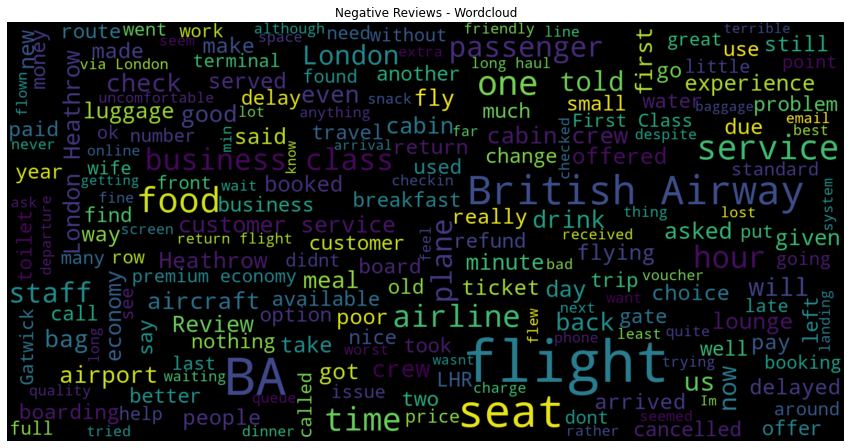

In [12]:
consolidated=' '.join(word for word in ba['Reviews'][ba['Sentiment']==0].astype(str))

wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.title("Negative Reviews - Wordcloud")
plt.axis('off')
plt.show()


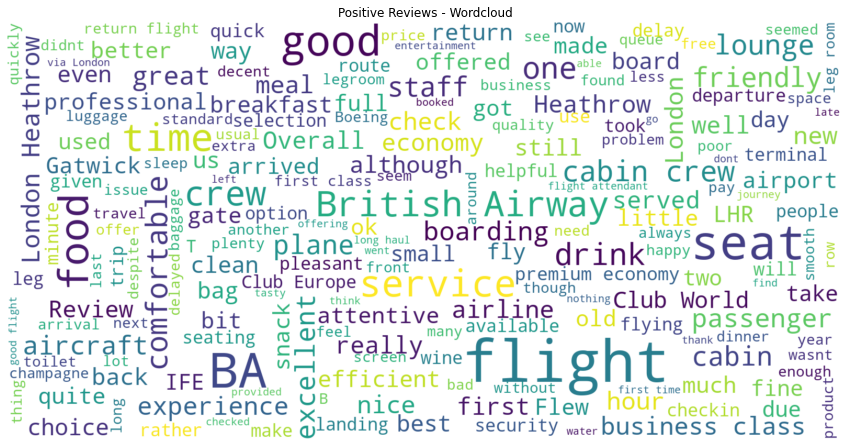

In [13]:
consolidated=' '.join(word for word in ba['Reviews'][ba['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110, background_color="white")
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.title("Positive Reviews - Wordcloud")

plt.axis('off')
plt.show()


In [14]:
from sklearn import metrics

c_matrix = metrics.confusion_matrix(y_test, preds)
print(c_matrix)



[[422  31]
 [ 92 194]]


In [15]:
y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(preds, name='Predicted')
print(pd.crosstab(y_actual, y_predicted))


Predicted   0   1
Actual           
0          88  28
1          33  20


In [16]:
print(metrics.accuracy_score(y_actual, y_predicted))


0.8335588633288228


In [17]:
print(metrics.precision_score(y_actual, y_predicted))


0.8622222222222222


In [18]:
print(metrics.recall_score(y_actual, y_predicted))


0.6783216783216783


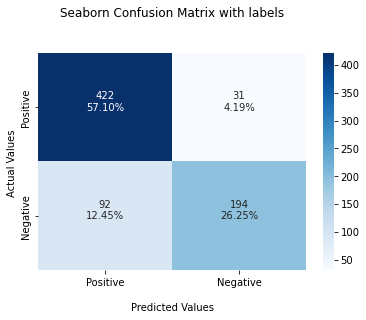

In [19]:
import seaborn as sns

group_counts = ["{0:0.0f}".format(value) for value in
                c_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative'])

plt.show()


In [20]:
sentiment_counts = ba.groupby(['Sentiment']).size()
print(sentiment_counts)


Sentiment
0    1817
1    1136
dtype: int64


Sentiment
0    1817
1    1136
dtype: int64


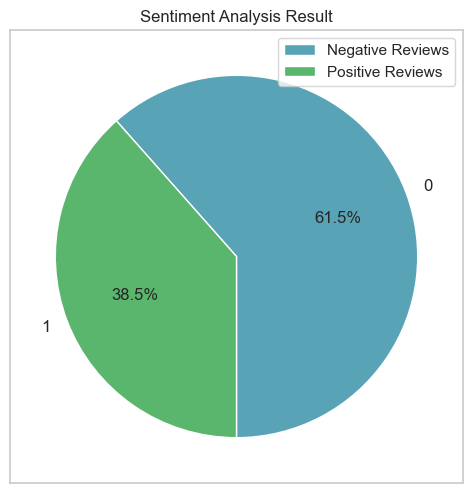

In [29]:
import seaborn as sns

sentiment_counts = ba.groupby(['Sentiment']).size()
print(sentiment_counts)

fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sns.set_theme(style="whitegrid")

sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="", colors = ('#59a3b6','#59b66c'))
plt.legend(['Negative Reviews','Positive Reviews'])
plt.title("Sentiment Analysis Result")
plt.box()
